In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('Housing.csv')
train_data, test_data = train_test_split(data, test_size=0.2)

print(train_data.shape)
print(test_data.shape)


(436, 13)
(109, 13)


In [20]:
# to visualize the data
print(train_data)

       price   area  bedrooms  bathrooms  stories mainroad guestroom basement  \
87   6475000   3960         3          1        1      yes        no      yes   
22   8645000   8050         3          1        1      yes       yes      yes   
388  3500000   3650         3          1        2      yes        no       no   
470  3010000   5076         3          1        1       no        no       no   
502  2660000   3480         2          1        1      yes        no       no   
..       ...    ...       ...        ...      ...      ...       ...      ...   
191  5040000  10700         3          1        2      yes       yes      yes   
129  5873000  11460         3          1        3      yes        no       no   
226  4690000   5170         3          1        4      yes        no       no   
347  3836000   3350         3          1        2      yes        no       no   
293  4200000   4410         2          1        1       no        no       no   

    hotwaterheating aircond

In [21]:
#x_train is the input variable, a vector of the input variables area in sq ft, bedrooms, bathrooms, etc.
#y_train is the output variable, the price of the house in $1000 

train_data = pd.DataFrame(train_data).to_numpy()
test_data = pd.DataFrame(test_data).to_numpy()


x_train = np.column_stack((train_data[:,1], train_data[:,2], train_data[:,3], train_data[:,4], train_data[:,7], train_data[:,10]))
y_train = train_data[:, 0]


x_test = np.column_stack((test_data[:,1], test_data[:,2], test_data[:,3], test_data[:,4], test_data[:,7], test_data[:,10]))
y_test = test_data[:, 0]

print(x_train)
print(y_train)
print(x_train.shape)
print(y_train.shape)

[[3960 3 1 1 'yes' 2]
 [8050 3 1 1 'yes' 1]
 [3650 3 1 2 'no' 0]
 ...
 [5170 3 1 4 'no' 0]
 [3350 3 1 2 'no' 0]
 [4410 2 1 1 'no' 1]]
[6475000 8645000 3500000 3010000 2660000 1750000 3710000 3045000 3395000
 6300000 4235000 3430000 8400000 5460000 4515000 5652500 5600000 4753000
 2653000 2835000 5229000 6090000 3360000 1820000 4200000 4473000 7840000
 6300000 5943000 4620000 7350000 4760000 3115000 7420000 4025000 3850000
 3010000 2870000 3850000 4410000 4473000 5950000 3850000 4900000 2852500
 3423000 6090000 5600000 3150000 5810000 4900000 6685000 10150000 5530000
 3780000 3150000 4970000 7070000 3703000 4900000 12250000 5740000 4305000
 8400000 2100000 3500000 3430000 4585000 5950000 4130000 3920000 4340000
 6230000 3640000 5250000 2800000 4270000 5530000 5873000 6020000 4620000
 4410000 8645000 4025000 5950000 2940000 2590000 4235000 8043000 3640000
 5460000 3493000 3815000 3500000 3500000 7350000 2940000 2450000 3640000
 4270000 4907000 4200000 11410000 5110000 3360000 3500000 469

In [22]:
#Using one hot encoding to change categorical data into numerical data

for i in range (x_train.shape[0]):
    for j in range(x_train.shape[1]):
        if x_train[i][j] == 'yes':
            x_train[i][j] = 1
        elif x_train[i][j] == 'no':
            x_train[i][j] = 0
            
for i in range (x_test.shape[0]):
    for j in range(x_test.shape[1]):
        if x_test[i][j] == 'yes':
            x_test[i][j] = 1
        elif x_test[i][j] == 'no':
            x_test[i][j] = 0

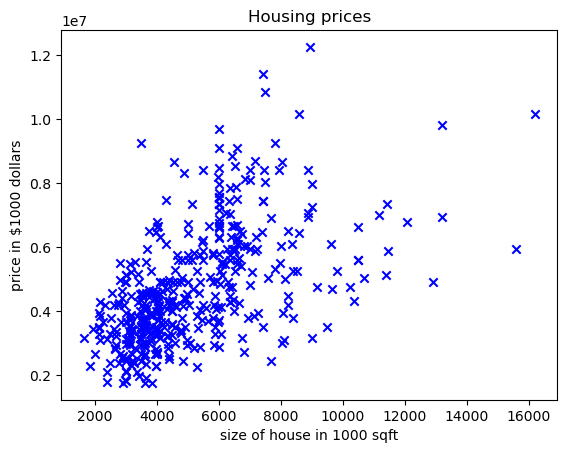

In [23]:
#how to plot data as a scatterplot with matplotlib for one variable
plt.scatter(x_train[:,0], y_train, marker = "x", c = "b")
#setting the title
plt.title("Housing prices")
plt.ylabel("price in $1000 dollars")
plt.xlabel("size of house in 1000 sqft")
plt.show()

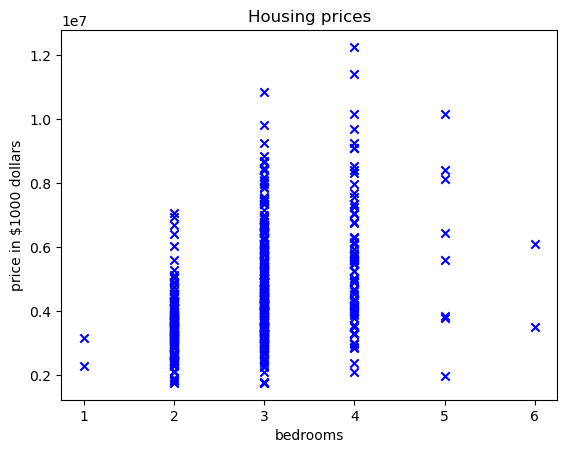

In [24]:
plt.scatter(x_train[:,1], y_train, marker = "x", c = "b")
#setting the title
plt.title("Housing prices")
plt.ylabel("price in $1000 dollars")
plt.xlabel("bedrooms")
plt.show()

In [25]:
# normalizing the data for both training and test set to make gradient descent more efficient

for j in range(x_train.shape[1]):
    x_train[:,j] = (x_train[:,j] - np.mean(x_train[:,j])) / np.std(x_train[:,j])
    x_test[:,j] = (x_test[:,j] - np.mean(x_test[:,j])) / np.std(x_test[:,j])
    
# dividing y values by 10**6 to make computation easier, we'll multiply results back by 10 ** 6 in the end

y_train /= 10.0 ** 6
y_test /= 10.0 ** 6

Task: Use Gradient Descent to create a linear regression to most accurately predict housing prices based on some training examples. This is set as the baseline model

In [26]:
def function(x, w, b):
    '''
    Computes the prediction of a linear model
    Args:
    x (ndarray (n, )): an example house with n features
    w (ndarray (n, )): weights for each of the n features
    b (scalar)    : bias
    Returns
      f_wb (scalar): model prediction
    '''
    f_wb = np.dot(w, x) + b
    
    return f_wb

In [27]:
#The cost function

def compute_cost(x,y,w,b):
    '''
    computes cost function for linear regression
    Args:
      x (ndarray (m,n)): Data, m examples, n factors for each example
      y (ndarray (m,)): target values
      w (ndarray (n, )): weights for each of the n variables
      b (scalar)    : bias
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    '''
    
    m = x.shape[0] #number of training examples 
    
    total_cost = 0
    
    for i in range(m):
        f_wb_i = function(x[i], w, b)              #model prediction
        total_cost += (f_wb_i - y[i])**2    #mean-squared error
        
    total_cost = total_cost*(1/(m))     #divide by 2m to get the average
    
    return total_cost

In [28]:
#gradient function, it calculates derivative of the cost

def compute_gradient(x, y, w, b):

    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m, n)): Data, m examples 
      y (ndarray (m, )): target values
      w (ndarray (n, )): weights for each of the n variables
      b (scalar)    : bias
    Returns
      dj_dw (ndarray (n, )): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    """
    A formula for the value of the gradient is found by using chain rule, we counterintuitively divided by 2
    in cost formula to account for the exponent multiplying in the gradient calculation.
    """
    
    m = x.shape[0]
    n = x.shape[1]
    dj_dw = np.zeros(n)
    dj_db = 0
    
    for i in range (m):
        f_wb_i = function(x[i], w, b) 
        
        for j in range (n):
            dj_dw[j] += (f_wb_i - y[i]) * x[i][j]
            
        dj_db += (f_wb_i - y[i])
    dj_dw *= (0.5/m)
    dj_db *= (0.5/m)
    
    return dj_dw, dj_db

In [29]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m, n)): Data, m examples with n features
      y (ndarray (m,))  : target values
      w_in (ndarray (n)): weights for the n features
      b_in (scalar): bias of model parameters  
      alpha (float):      Learning rate
      num_iters (int):    number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n)): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      """
    
    m = x.shape[0]
    learningCurve = np.zeros(num_iters)
    
    #iteratively optimizing w and b by nudging them in the direction of steepest descent
    for i in range (num_iters):
        #compute gradient
        dj_dw, dj_db = compute_gradient(x, y, w_in, b_in)
        
        #update w and b
        w_in = w_in - alpha * dj_dw
        b_in = b_in - alpha * dj_db
        learningCurve[i] = compute_cost(x, y, w_in, b_in)
        
    
    return w_in, b_in, learningCurve
        
        

In [30]:
# Calculates the optimized w vector, b scalar, and learning curve over 1000 iterations from the training data
w, b, learningCurve = gradient_descent(x_train, y_train, np.zeros(x_train.shape[1]), 0, 1.0e-3, 1500)

# we let the baseline prediction be the mean price of the training data and the test data, and we compare
# the performance of your model w.r.t to this baseline

baseline_training_MSE = compute_cost(x_train, y_train, w, b)
baseline_test_MSE = compute_cost(x_test, y_test, w, b)

print(baseline_training_MSE)
print(baseline_test_MSE)
print('Note that since we divided y values by 10 ** 6, the real MSE would be larger by a factor of 10 ** 12 roughly')

# we use this as the baseline

6.428959937965355
8.458765270793858
Note that since we divided y values by 10 ** 6, the real MSE would be larger by a factor of 10 ** 12 roughly


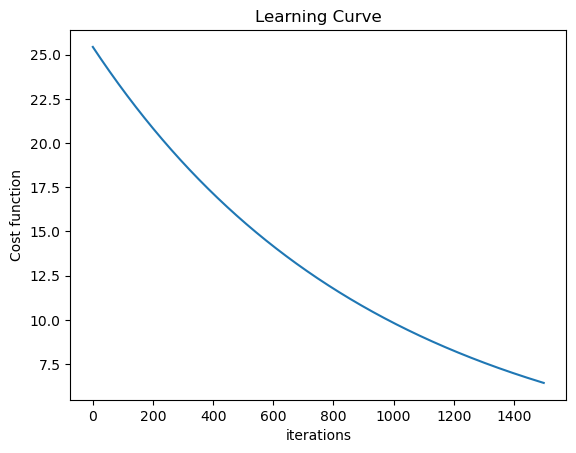

In [31]:
plt.plot(np.arange(1500), learningCurve)

plt.title("Learning Curve")
plt.ylabel("Cost function")
plt.xlabel("iterations")
plt.show()

Training a Neural Network to Predict Housing Prices

In [32]:
def sigmoid(z):
    z = np.clip( z, -500, 500 ) # to prevent overflow
    return 1 / (1 + np.exp(-z.astype(float)))

In [33]:
class NeuralNetwork:
    """a neural network containing a list of layers
    """
    
    def __init__(self, structure, alpha):
        self.structure = structure
        self.alpha = alpha
        self.Bn = [np.random.rand(l, 1) for l in structure[1:]] # list of all bias vectors in hidden layers
        
        self.Wn = [np.random.rand(l, next_l) for l, next_l in zip(structure[:-1], structure[1:])] # list of all weight matrices in hidden layers
        
    
    def forwardProp(self, x):
        """forward propogation algorithm, it takes the input data as a vector
        and repeatedly uses matrix vector multiplication and sigmoid activation
        until the output layer is reached
        """
        
        
        x_reshape = np.reshape(x, (x.shape[0], 1))
        An = [] # list of vectors of sigmoid activated inputs from each layer
        Zn = [] # list of vectors of raw inputs from each layer
        
        for b, W in zip(self.Bn, self.Wn):
            if len(Zn) == 0:
                z = np.transpose(W) @ x_reshape + b 
            else:
                z = np.transpose(W) @ a + b
            
            # print('size of vector passed to next layer is: ', z.shape)
                
            a = z    
            if W is not self.Wn[-1]: # this works rn, linear activation in final layer
                a = sigmoid(z)
                
            Zn.append(z)
            An.append(a)
        # print(An)
        return An[-1][0][0] # final output value, the price
    
    def backProp(self, x, y):
        """backpropogation algorithm, calculates costs and applies chain rule backwards to find gradients
        """
        dJ_dBn = [np.zeros(b.shape) for b in self.Bn] # same shape as Bn 
        dJ_dWn = [np.zeros(W.shape) for W in self.Wn] # same shape as Wn
        
        Zn = [] # raw output
        An = [] # output after function applied
        
        x_reshape = np.reshape(x, (x.shape[0], 1))
        
        #calculating activations and raw outputs for later gradient calculations
        for b, W in zip(self.Bn, self.Wn):
            if len(Zn) == 0:
                z = np.transpose(W) @ x_reshape + b
            else:
                z = np.transpose(W) @ a + b

            a = np.copy(z)    
            if W is not self.Wn[-1]:
                a = sigmoid(a)

            Zn.append(np.copy(z))
            An.append(np.copy(a))
        # print(Zn)
        # print([Zn[L].shape for L in range(len(self.structure) - 1)])
        # print('------------------------------------------------------')
        
        
        # iteratively applying chain rule
        for L in range (len(self.structure) - 2, -1, -1):
            
            if L == len(self.structure) - 2:
                delta = 2 * (np.copy(An[L]) - np.copy(y))  # since last layer is linear
            else:
                delta = np.copy(Zn[L]) * (1 - np.copy(Zn[L])) *(self.Wn[L+1] @ delta) # da_dz * dz_dw * dJ_da = dJ_dw
            
            dJ_dBn[L] = np.copy(delta)
            if L == 0:
                dJ_dWn[L] = x_reshape @ np.transpose(delta)
            else:
                dJ_dWn[L] = An[L - 1] @ np.transpose(delta)

        return dJ_dBn, dJ_dWn
        
    
    def gradient_descent(self, X, y):
        
        avg_dJ_dBn= [np.zeros(b.shape) for b in self.Bn]
        avg_dJ_dWn = [np.zeros(W.shape) for W in self.Wn]
        
        for m in range(len(X)):
            dJ_dBn, dJ_dWn = self.backProp(X[m], y[m])

            avg_dJ_dBn = [avg_dJ_dBn[i] + dJ_dBn[i] for i in range(len(dJ_dBn))]
            
            avg_dJ_dWn = [avg_dJ_dWn[i] + dJ_dWn[i] for i in range(len(dJ_dWn))]
        
        avg_dJ_dBn = [avg_dJ_dBn[i] / len(X) for i in range(len(avg_dJ_dBn))]
        avg_dJ_dWn = [avg_dJ_dWn[i] / len(X) for i in range(len(avg_dJ_dWn))]
        
        self.Bn = [np.clip(self.Bn[i] - self.alpha * avg_dJ_dBn[i],-500, 500) for i in range(len(avg_dJ_dBn))]
        self.Wn = [np.clip(self.Wn[i] - self.alpha * avg_dJ_dWn[i],-500, 500) for i in range(len(avg_dJ_dWn))]
        
        

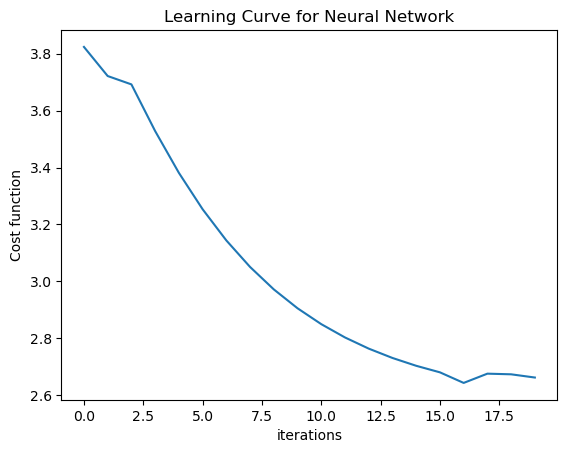

3.868365943433906
3.868365943434055
baseline training MSE:  6.428959937965355 | neural network training MSE:  2.6620597404119364
training improvement in % from baseline model:  58.59268425843654

baseline test MSE:  8.458765270793858 | neural network test MSE:  4.011233469257468
test improvement from baseline model:  52.57897174298806


In [34]:
predictor = NeuralNetwork([6, 10, 8, 1], 0.01)

# training the neural network
iterations = 20
neural_curve = []
for itr in range(iterations):
    predictor.gradient_descent(x_train, y_train)
    MSE = 0
    for i in range(x_train.shape[0]):
        y_pred = predictor.forwardProp(x_train[i])
        MSE += (y_pred - y_train[i]) ** 2
    MSE /= x_train.shape[0]
    neural_curve.append(MSE)

plt.plot(np.arange(iterations), neural_curve);

plt.title("Learning Curve for Neural Network")
plt.ylabel("Cost function")
plt.xlabel("iterations")
plt.show()

    

neural_MSE_train = 0
neural_MSE_test = 0

y_pred_train = []
y_pred_test = []

for i in range(x_train.shape[0]):
    y_pred = predictor.forwardProp(x_train[i])
    neural_MSE_train += (y_pred - y_train[i]) ** 2
    y_pred_train.append(y_pred)

for i in range (x_test.shape[0]):
    y_pred = predictor.forwardProp(x_test[i])
    neural_MSE_test += (y_pred - y_test[i]) ** 2
    y_pred_test.append(y_pred)

neural_MSE_train /= x_train.shape[0]
neural_MSE_test /= x_test.shape[0]
    
print('baseline training MSE: ', baseline_training_MSE, '| neural network training MSE: ', neural_MSE_train)
print ('training improvement in % from baseline model: ',100 * (-neural_MSE_train + baseline_training_MSE)/baseline_training_MSE)

print()

print('baseline test MSE: ', baseline_test_MSE, '| neural network test MSE: ', neural_MSE_test)
print ('test improvement from baseline model: ',100 * (-neural_MSE_test + baseline_test_MSE)/baseline_test_MSE)

Final comments:

The neural network predictions for housing prices show rougly a 40-50% improvement in the mean squared error from the predictions made by the baseline model, multivariable linear regression.